


---


# **TP TEXT MINING**

---





In [23]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import wordnet
from nltk.corpus import words

In [24]:
nltk.download('stopwords')
nltk.download('words')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [25]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
file_path = "/content/drive/MyDrive/youtoxic_english_1000.csv"
data = pd.read_csv(file_path)

In [27]:
data

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ugi5ADt10EdDz3gCoAEC,XRuCW80L9mA,I remember that they sent in the national defe...,False,False,False,False,False,False,False,False,False,False,False,False
996,Ugifh2DMhBbDkHgCoAEC,XRuCW80L9mA,Stats don`t represent the problem. Race baitin...,True,False,False,False,False,True,True,False,False,False,False,False
997,Ugj_plbGBjjzYXgCoAEC,XRuCW80L9mA,The quote from the mother... Wow that hit hard...,False,False,False,False,False,False,False,False,False,False,False,False
998,Ugj0bah1De8xy3gCoAEC,XRuCW80L9mA,this video is so racist,False,False,False,False,False,False,False,False,False,False,False,False




---
#**PHASE I**


---

In [28]:
comments = data[['CommentId', 'Text']]
comments.columns = ['CommentId', 'Text']
comments

,CommentId,Text
0,Ugg2KwwX0V8-aXgCoAEC,If only people would just take a step back and...
1,Ugg2s5AzSPioEXgCoAEC,Law enforcement is not trained to shoot to app...
2,Ugg3dWTOxryFfHgCoAEC,\nDont you reckon them 'black lives matter' ba...
3,Ugg7Gd006w1MPngCoAEC,There are a very large number of people who do...
4,Ugg8FfTbbNF8IngCoAEC,"The Arab dude is absolutely right, he should h..."
...,...,...
995,Ugi5ADt10EdDz3gCoAEC,I remember that they sent in the national defe...
996,Ugifh2DMhBbDkHgCoAEC,Stats don`t represent the problem. Race baitin...
997,Ugj_plbGBjjzYXgCoAEC,The quote from the mother... Wow that hit hard...
998,Ugj0bah1De8xy3gCoAEC,this video is so racist


In [29]:
# Nettoyage du texte
def text_cleanup(comment):
    cleaned_comment = ''.join(c for c in comment if c.isalnum() or c.isspace())
    return cleaned_comment

# Conversion en minuscules
def lowercase(comment):
    return comment.lower()

# Tokenisation
def tokenize(comment):
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(comment)
    return tokens

# Suppression des stopwords
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]
    return filtered_tokens

# Lemmatisation
def lemmatize(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmas = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmas

# Stemming
def stem(tokens):
    stemmer = PorterStemmer()
    stems = [stemmer.stem(token) for token in tokens]
    return stems

# Unification des nombres
def unify_numbers(tokens):
    unified_tokens = [token if not token.isdigit() else "NUM" for token in tokens]
    return unified_tokens



**Appliquer le prétraitement du texte au DataFrame des commentaires:**









In [30]:
processed_comments = []

for index, row in comments.iterrows():
    comment_id = row['CommentId']
    text = row['Text']
    
    # Nettoyage du texte
    cleaned_text = text_cleanup(text)

    # Conversion en minuscules
    lowercased_text = lowercase(cleaned_text)

    # Tokenisation
    tokenized_text = tokenize(lowercased_text)

    # Suppression des stopwords
    filtered_text = remove_stopwords(tokenized_text)

    # Lemmatisation
    lemmatized_text = lemmatize(filtered_text)

    # Stemming
    stemmed_text = stem(lemmatized_text)

    # Unification des nombres
    unified_text = unify_numbers(stemmed_text)

    # Ajout du commentaire traité à la liste
    processed_comments.append({'CommentId': comment_id, 'ProcessedText': unified_text})

# Création du DataFrame à partir de la liste de dictionnaires
processed_comments = pd.DataFrame(processed_comments)


In [31]:
processed_comments

,CommentId,ProcessedText
0,Ugg2KwwX0V8-aXgCoAEC,"[peopl, would, take, step, back, make, case, w..."
1,Ugg2s5AzSPioEXgCoAEC,"[law, enforc, train, shoot, apprehend, train, ..."
2,Ugg3dWTOxryFfHgCoAEC,"[dont, reckon, black, life, matter, banner, he..."
3,Ugg7Gd006w1MPngCoAEC,"[larg, number, peopl, like, polic, offic, call..."
4,Ugg8FfTbbNF8IngCoAEC,"[arab, dude, absolut, right, shot, NUM, extra,..."
...,...,...
995,Ugi5ADt10EdDz3gCoAEC,"[rememb, sent, nation, defenc]"
996,Ugifh2DMhBbDkHgCoAEC,"[stat, dont, repres, problem, race, bait, atti..."
997,Ugj_plbGBjjzYXgCoAEC,"[quot, mother, wow, hit, hard, accur]"
998,Ugj0bah1De8xy3gCoAEC,"[video, racist]"


In [32]:
data['Text'] = processed_comments['ProcessedText']
data

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,"[peopl, would, take, step, back, make, case, w...",False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,"[law, enforc, train, shoot, apprehend, train, ...",True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,"[dont, reckon, black, life, matter, banner, he...",True,True,False,False,True,False,False,False,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,"[larg, number, peopl, like, polic, offic, call...",False,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"[arab, dude, absolut, right, shot, NUM, extra,...",False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ugi5ADt10EdDz3gCoAEC,XRuCW80L9mA,"[rememb, sent, nation, defenc]",False,False,False,False,False,False,False,False,False,False,False,False
996,Ugifh2DMhBbDkHgCoAEC,XRuCW80L9mA,"[stat, dont, repres, problem, race, bait, atti...",True,False,False,False,False,True,True,False,False,False,False,False
997,Ugj_plbGBjjzYXgCoAEC,XRuCW80L9mA,"[quot, mother, wow, hit, hard, accur]",False,False,False,False,False,False,False,False,False,False,False,False
998,Ugj0bah1De8xy3gCoAEC,XRuCW80L9mA,"[video, racist]",False,False,False,False,False,False,False,False,False,False,False,False


In [33]:
data[['Text','IsRacist']]

,Text,IsRacist
0,"[peopl, would, take, step, back, make, case, w...",False
1,"[law, enforc, train, shoot, apprehend, train, ...",False
2,"[dont, reckon, black, life, matter, banner, he...",False
3,"[larg, number, peopl, like, polic, offic, call...",False
4,"[arab, dude, absolut, right, shot, NUM, extra,...",False
...,...,...
995,"[rememb, sent, nation, defenc]",False
996,"[stat, dont, repres, problem, race, bait, atti...",True
997,"[quot, mother, wow, hit, hard, accur]",False
998,"[video, racist]",False


In [34]:
data['IsRacist'] = data['IsRacist'].astype(int)
data[['Text','IsRacist']]

,Text,IsRacist
0,"[peopl, would, take, step, back, make, case, w...",0
1,"[law, enforc, train, shoot, apprehend, train, ...",0
2,"[dont, reckon, black, life, matter, banner, he...",0
3,"[larg, number, peopl, like, polic, offic, call...",0
4,"[arab, dude, absolut, right, shot, NUM, extra,...",0
...,...,...
995,"[rememb, sent, nation, defenc]",0
996,"[stat, dont, repres, problem, race, bait, atti...",1
997,"[quot, mother, wow, hit, hard, accur]",0
998,"[video, racist]",0


In [35]:
word_data = []

# Iterate over the rows of the original data
for index, row in data.iterrows():
    comment_words = row['Text']
    is_racist = row['IsRacist']
    
    # Iterate over each word in the comment
    for word in comment_words:
        # Append a new dictionary to the word_data list
        word_data.append({'Word': word, 'IsRacist': is_racist})

# Create the DataFrame from the list of dictionaries
word_data = pd.DataFrame(word_data, columns=['Word', 'IsRacist'])


In [36]:
word_data

,Word,IsRacist
0,peopl,0
1,would,0
2,take,0
3,step,0
4,back,0
...,...,...
17579,racist,0
17580,god,0
17581,narrat,0
17582,annoy,0


In [37]:
word_counts = word_data['Word'].value_counts(sort=True)
print(word_counts)

black         302
peopl         260
NUM           249
get           184
polic         177
             ... 
robberybut      1
sceneof         1
firstli         1
breath          1
annoy           1
Name: Word, Length: 3472, dtype: int64


In [38]:
word_data[word_data['IsRacist']==1]

,Word,IsRacist
265,check,1
266,tube,1
267,post,1
268,black,1
269,man,1
...,...,...
17567,sure,1
17568,sign,1
17569,left,1
17570,wing,1


In [39]:
word_counts = word_data['Word'].value_counts(sort=True)
print(word_counts)

black         302
peopl         260
NUM           249
get           184
polic         177
             ... 
robberybut      1
sceneof         1
firstli         1
breath          1
annoy           1
Name: Word, Length: 3472, dtype: int64



---
#**PHASE II**






---



In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [41]:
# Créer une instance du vectoriseur TF-IDF
vectorizer = TfidfVectorizer()

# Adapter le vectoriseur sur les données de mots
tfidf_matrix = vectorizer.fit_transform(word_data['Word'])

# Convertir la matrice TF-IDF en un DataFrame
tfidf_data = pd.DataFrame(tfidf_matrix.toarray(), columns=sorted(vectorizer.vocabulary_.keys()))

# Ajouter la colonne "IsRacist" au DataFrame TF-IDF
tfidf_data['IsRacist'] = word_data['IsRacist']

# Calculer le nombre total de commentaires racistes et non racistes
total_racist_comments = tfidf_data.loc[tfidf_data['IsRacist'] == 1].shape[0]
total_non_racist_comments = tfidf_data.loc[tfidf_data['IsRacist'] == 0].shape[0]

# Calculer le poids d'être raciste pour chaque mot
word_weights = {}
for word in tfidf_data.columns[:-1]:
    is_racist_counts = tfidf_data.loc[tfidf_data['IsRacist'] == 1, word].sum()
    non_racist_counts = tfidf_data.loc[tfidf_data['IsRacist'] == 0, word].sum()
    
    word_weights[word] = is_racist_counts / total_racist_comments - non_racist_counts / total_non_racist_comments

# Créer une liste pour stocker les dictionnaires de chaque ligne
result = []

# Itérer sur chaque mot et poids
for word, weight in word_weights.items():
    result.append({'Word': word, 'Weight': weight})

# Créer un nouveau DataFrame à partir de la liste de dictionnaires
word_weight = pd.DataFrame(result)
word_weight= word_weight.sort_values(by='Weight', ascending=False)
# Afficher le nouveau DataFrame
word_weight


,Word,Weight
327,black,0.018762
3363,white,0.014764
2232,peopl,0.007903
1780,like,0.007025
3091,thug,0.006593
...,...,...
1346,guy,-0.002850
1215,fuck,-0.003109
3284,video,-0.003410
650,cop,-0.004512


In [42]:
from sklearn.preprocessing import MinMaxScaler

# Créer une instance du scaler min-max
scaler = MinMaxScaler()

# Appliquer la mise à l'échelle sur la colonne 'Weight'
word_weight['Weight'] = scaler.fit_transform(word_weight['Weight'].values.reshape(-1, 1))


In [43]:
word_weight

,Word,Weight
327,black,1.000000
3363,white,0.848043
2232,peopl,0.587214
1780,like,0.553846
3091,thug,0.537420
...,...,...
1346,guy,0.178425
1215,fuck,0.168597
3284,video,0.157133
650,cop,0.115264


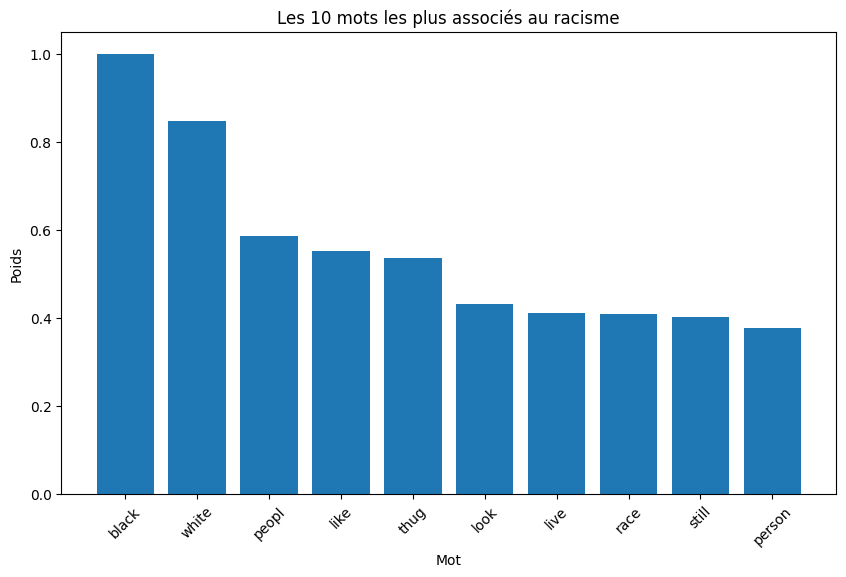

In [44]:
import matplotlib.pyplot as plt

# Obtenir les 10 premières lignes du DataFrame trié
top_10_weights = word_weight.head(10)

# Créer le graphique
plt.figure(figsize=(10, 6))
plt.bar(top_10_weights['Word'], top_10_weights['Weight'])
plt.xlabel('Mot')
plt.ylabel('Poids')
plt.title('Les 10 mots les plus associés au racisme')
plt.xticks(rotation=45)
plt.show()
